# Tarea 1 - Concepto de ciencia de datos: Análisis de Componentes Principales

[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guzmandb/Diplomado_Ciencia_Datos/blob/main/Tareas/Tarea1_JhersonGuzman.ipynb)

*Añadido en el segundo commit*

(Logo PCA)
<img src="https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png">
(Logo Python)
<img src="https://logos-world.net/wp-content/uploads/2021/10/Python-Symbol.png">

**Elaborado por:** 
    
    - Jherson Guzman Ramirez / 1032491453 / jheguzmanram@unal.edu.co

*Curso de Inteligencia Artificial / 2023-I* 

*Universidad Nacional de Colombia - Sede Bogotá*

**Profesor: Alvaro Montenegro**

13 de febrero de 2023

## Sobre el autor

**Jherson Guzman Ramirez** es un estudiante de la carrera de Estadística que cursa actualmente séptimo semestre en la Universidad Nacional de Colombia, Sede Bogotá. 

Tiene 25 años, es oriundo de Bogotá, dentro de sus hobbies se encuentra montar bicicleta, hacer ecoturismo, viajar y aprender acerca de diferentes culturas.

Es una persona ética, responsable y dispuesto a aprender mucho acerca de temáticas relacioanadas con la Ciencia de los Datos y sus múltiples ramas. 

<img src="https://avatars.githubusercontent.com/u/46854359?v=4">

# Análisis de Componentes Principales

Conocido como PCA, es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones conservando las información.

Si se tiene una muestra de $n$ individuos con $p$ variables $(X_{1},X_{2},\dots,X_{p})$. PCA permite hallar un número de factores factores subayecente $(z < p)$ que explica en su mayoría las $p$ variables originales. $z$ se conocen como componentes principales.

El $PCA$ pertenece a las técnicas de Aprendizaje no supervisado. 

## Cálculo de componentes principales

Cada componente principal $(Z_{i})$ se obtiene por combinación lineal de las variables originales. Se pueden entender como nuevas variables obtenidas al combinar de una determinada forma las variables originales. 

La primera componente principal de un grupo de variables $(X_{1}, X_{2}, \dots , X_{p})$ es la combinación lineal normalizada de dichas variables que tiene mayor varianza:

$$Z_{1}=\phi_{11}X_{1}+\phi_{21}X_{2}+\dots+\phi{p1}X_{p}$$

El hecho que la combinación lineal sea normalizada implica que:

$$\sum_{j=1}^{p} \phi^{2}_{j1} = 1$$

Los términos $\phi_{11},\dots,\phi_{1p}$ reciben en el nombre de loadings y son los que definen a la componente correspondiente. Se pueden entender como el peso que tiene cada variable en cada componente.

Para un conjunto de datos $X$ con $n$ observaciones y $p$ variable, los pasos para *calcular la primera componente principal* es:

- Centralización de las variables: se resta a cada valor la media de la variable a la que pertenece.

- Se resuelve un problema de optimización para encontrar el valor de los loadings con los que se maximiza la varianza. Puede ser neduabte el cálculo de los eigenvalores-vectores de la matriz de covarianzas

Una vez calculada la primera componente $(Z_{1})$ se calcula la segunda $(Z_{2})$ repitiendo el mismo proceso, pero añadiendo la condición de que la combinación lineal no pude estar correlacionada con la primera componente. EL proceso se repite de forma iterativa hasta calcular todas las posibles componentes $(min(n-1, p))$ o se decida detenerse

## Ejemplo

#### Extraído de referencia [2]

Utilizaremos Python para realizar el Análisis de Componentes Principales del dataset **USArrests** contiene el porcentaje de asaltos *(Assault)*, asesinatos *(Murder)* y secuestros *(Rape)* por cada 100,000 habitantes para cada uno de los 50 estados de USA en 1973

In [9]:
#Importación de librerías para tratamiento de datos, gráficos
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


In [10]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")

datos = USArrests.data

In [13]:
print('Resumen y primeros 4 datos del dataset')
datos.info()

datos.head(4)

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


In [17]:
print('Media de cada variable')
datos.mean(axis=0)

Media de cada variable


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [16]:
print('Varianza de cada variable')
datos.var(axis=0)

Varianza de cada variable


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [19]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [20]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


La primera componente es el resultado de la siguiente combinación de las variables originales

$PC1 = 0.535899 \textrm{ Murder}+0.583184 \textrm{ Assault}+0.278191 \textrm{ UrbanPop}+0.543432 \textrm{ Rape}$

Y así consecuentemente para las componentes $PC2, PC3, PC4$

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

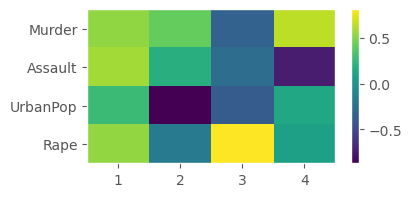

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer **la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada**

Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408  0.04335752]


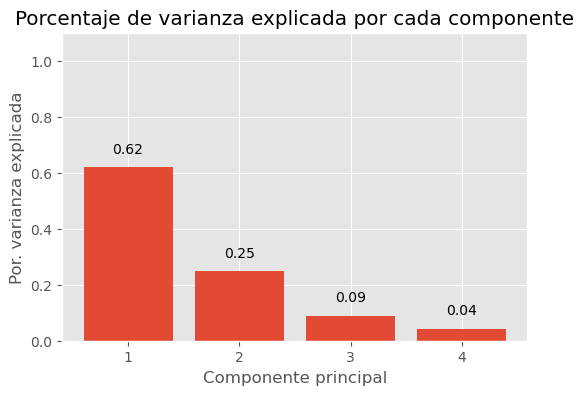

In [25]:
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el $62\%$ de la varianza observada en los datos y la segunda el $24.7\%$.

Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


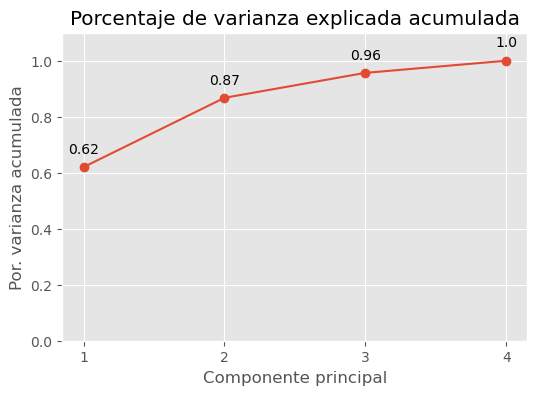

In [27]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada.

Una vez entrenado el modelo, con el método **transform()** se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [28]:
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables.

#### Muchas gracias por la atención

# Referencias

[1] Análisis de Componentes Principales (Principal Component Analysis, PCA) y t-SNE. 
https://rpubs.com/Joaquin_AR/287787

[2] PCA con Python https://www.cienciadedatos.net/documentos/py19-pca-python.html